<a href="https://colab.research.google.com/github/ShanmugapriyanManoharan/OpenCV-Deep-Learning/blob/master/NLP2_Recognize_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import json
import tensorflow as tf

In [0]:
vocab_size = 10000
embedding_dim = 32
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [3]:
#downloading the dataset
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

--2020-06-03 21:57:37--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 2607:f8b0:400e:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.05s   

2020-06-03 21:57:37 (97.9 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [0]:
with open("/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [0]:
#Splitting the training and test data
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [0]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

In [0]:
word_index = tokenizer.word_index

In [0]:
#Training sequence
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [0]:
#Testing sequence
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [0]:
#Converting the sequences into numpy array
import numpy as np

In [0]:
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [0]:
#Model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 32)           320000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                792       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 320,817
Trainable params: 320,817
Non-trainable params: 0
_________________________________________________________________


In [43]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 4s - loss: 0.6394 - accuracy: 0.6273 - val_loss: 0.4994 - val_accuracy: 0.8134
Epoch 2/30
625/625 - 4s - loss: 0.3768 - accuracy: 0.8495 - val_loss: 0.3623 - val_accuracy: 0.8496
Epoch 3/30
625/625 - 4s - loss: 0.2819 - accuracy: 0.8877 - val_loss: 0.3580 - val_accuracy: 0.8365
Epoch 4/30
625/625 - 4s - loss: 0.2314 - accuracy: 0.9097 - val_loss: 0.3421 - val_accuracy: 0.8569
Epoch 5/30
625/625 - 4s - loss: 0.1964 - accuracy: 0.9237 - val_loss: 0.3704 - val_accuracy: 0.8487
Epoch 6/30
625/625 - 4s - loss: 0.1714 - accuracy: 0.9355 - val_loss: 0.3710 - val_accuracy: 0.8533
Epoch 7/30
625/625 - 4s - loss: 0.1495 - accuracy: 0.9443 - val_loss: 0.3910 - val_accuracy: 0.8489
Epoch 8/30
625/625 - 4s - loss: 0.1333 - accuracy: 0.9525 - val_loss: 0.4141 - val_accuracy: 0.8471
Epoch 9/30
625/625 - 4s - loss: 0.1195 - accuracy: 0.9579 - val_loss: 0.4374 - val_accuracy: 0.8477
Epoch 10/30
625/625 - 4s - loss: 0.1071 - accuracy: 0.9630 - val_loss: 0.5188 - val_accuracy: 0.8255

In [0]:
#For plotting accuracy & loss
import matplotlib.pyplot as plt

In [0]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

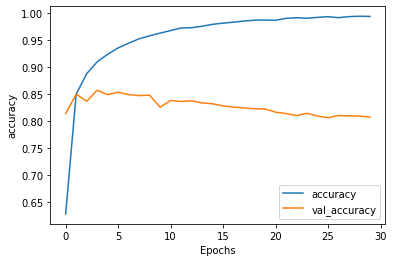

In [46]:
plot_graphs(history, "accuracy")

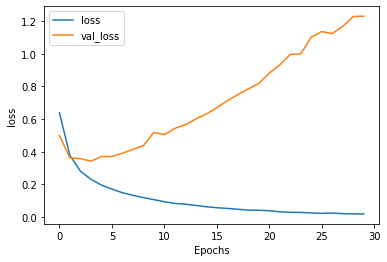

In [47]:
plot_graphs(history, "loss")

In [0]:
#Reversing the token into sentence (words)
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [0]:
def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [50]:
print(decode_sentence(training_padded[0]))

former <OOV> store clerk sues over secret 'black <OOV> for minority shoppers ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?


In [51]:
print(training_sentences[2])
print(labels[2])

mom starting to fear son's web series closest thing she will have to grandchild
1


In [52]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 32)


In [0]:
#writing into the file
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [0]:
#For importing/downloading the files
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

In [54]:
sentence = ["India wins the cricket worldcup", "the corona is killing the people"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))#0 to 1 -> indicates scarastic
#0 to -1 -> indicates non-scarastic

[[5.5366363e-02]
 [6.8589407e-06]]
